In [2]:
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Normal distributions are a simple, basic distribution to model the time given we only have basic estimation values. We have a max, min and mean times. The max and min mean that the normal distribution needs to be truncated within the range. truncnorm achieves this.
The next two cells just allow you to play around with the distribution that was used by plotting the pdf and looking at some generated samples. The generated samples are what is returned by the function in the actual code.
Using a scale of 5 for no reason other to widen the distribution. Since the times aren't narrowly identified it's better to have wide sampling of value within the target range and using a larger scale achieves this.

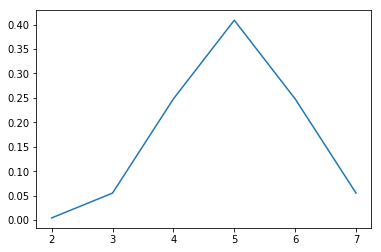

In [4]:
a_min = 2 # minimum process time
b_max = 7 # maximum process time
sig = 5 # mean process time

# generating an integer time vector
x = np.linspace(a_min-sig, b_max-sig, num=b_max-a_min+1)
# getting truncated normal distribution
# must be centred around the mean which must be adjusted to zero
trun_dist = truncnorm(a=a_min-sig, b=b_max-sig, scale=1)
# generating the distribution pdf
pdf = trun_dist.pdf(x)
# readjusting values to original scale
x = [val+sig for val in x]
plt.plot(x, pdf)
plt.show()

Function to actually do it:

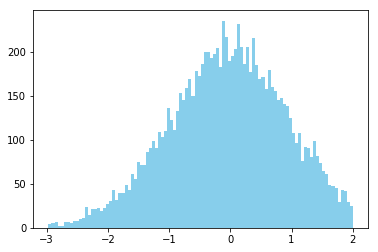

In [5]:
def generate_single_sample(a_min, b_max, sig):
    """ Takes process time min, max and mean and generates 1000 random samples."""
    samples = truncnorm.rvs(a=a_min-sig, b=b_max-sig, size=10000)
    return samples

#plotting the distribution of the samples
sns.distplot(generate_single_sample(a_min, b_max, sig),
             bins=100,
             kde=False,
             color='skyblue',
             hist_kws={"linewidth": 15,'alpha':1})
plt.show()